In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

from importlib import reload

import models
import plotting
import dataloaders as dl
import traintest as tt

Files already downloaded and verified
Files already downloaded and verified


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
import resnet
rs50 = resnet.ResNet50().to(device)

In [4]:
lr = .1

optimizer = optim.Adam( model.parameters(), lr=lr)
for epoch in range(50):
    tt.train(rs50, device, dl.CIFAR10_train_loader, optimizer, epoch)

optimizer_base.param_groups[0]['lr'] *= .1
for epoch in range(50):
    tt.train(rs50, device, dl.CIFAR10_train_loader, optimizer, epoch)

optimizer_base.param_groups[0]['lr'] *= .1
for epoch in range(50):
    tt.train(rs50, device, dl.CIFAR10_train_loader, optimizer, epoch)

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.460812
Train Epoch: 0 [10000/50000 (20%)]	Loss: 1.534425
Train Epoch: 0 [20000/50000 (40%)]	Loss: 1.583379
Train Epoch: 0 [30000/50000 (60%)]	Loss: 1.215329
Train Epoch: 0 [40000/50000 (80%)]	Loss: 1.021893
Train Epoch: 1 [0/50000 (0%)]	Loss: 1.029370
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.020240
Train Epoch: 1 [20000/50000 (40%)]	Loss: 0.900173
Train Epoch: 1 [30000/50000 (60%)]	Loss: 0.713147
Train Epoch: 1 [40000/50000 (80%)]	Loss: 0.660110
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.806019
Train Epoch: 2 [10000/50000 (20%)]	Loss: 0.676111
Train Epoch: 2 [20000/50000 (40%)]	Loss: 0.771354
Train Epoch: 2 [30000/50000 (60%)]	Loss: 0.621244
Train Epoch: 2 [40000/50000 (80%)]	Loss: 0.635493


In [ ]:
torch.save(rs50, 'SavedModels/resnet50.pth')

In [15]:
rs50 = torch.load('SavedModels/resnet50.pth')
gmm = models.GMM(1000, 3072)
gmm.find_solution(dl.X_CIFAR10, initialize=True, iterate=False, use_kmeans=False)
gmm_model = models.RobustModel(model, gmm, -3., dim=3072).to(device)
torch.save('SavedModels/gmm_CIFAR10.pth')

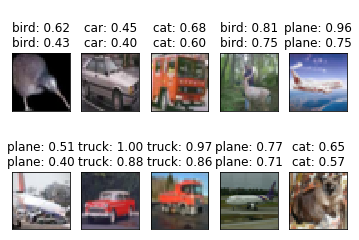

In [41]:
gmm_model.loglam.data = torch.tensor(-3., device=device)

data = enumerate(dl.CIFAR10_test_loader).__next__()[1][0]
y = model(data.to(device))
y2 = gmm_model(data.to(device))

plotting.plot_samples([y, y2], data, dataset = 'CIFAR10')

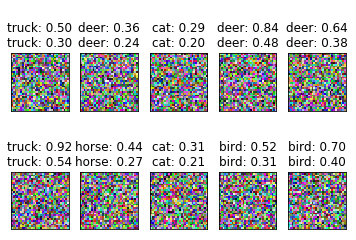

In [36]:
import matplotlib.pyplot as plt
data = torch.rand(10,3,32,32)
y = model(data.to(device))
y2 = gmm_model(data.to(device))

plotting.plot_samples([y, y2], data, dataset = 'CIFAR10')

In [38]:
min_conf = .1
tt.test(gmm_model, device, dl.CIFAR10_test_loader, min_conf=min_conf)
tt.test(model, device, dl.CIFAR10_test_loader, min_conf=min_conf)


Test set: Average loss: 1.9075, Accuracy: 4043/10000 (40%), Ave. Confidence: 59%


Test set: Average loss: 3.2014, Accuracy: 4043/10000 (40%), Ave. Confidence: 73%



(4043, 0.7319582595825195)